# Przykładowe rozwiązanie uzyskane przez algorytm symulowanego wyżarzania

Importowanie bibliotek

In [5]:
import tap_lib.Factory as fac
import tap_lib.Solver as sol
import tap_lib.Visualisation as vis

import numpy as np
import os

Definiowanie funkcji, zmiennych, tworzenie solvera, przeprowadzenie symulacji i analiza wyników

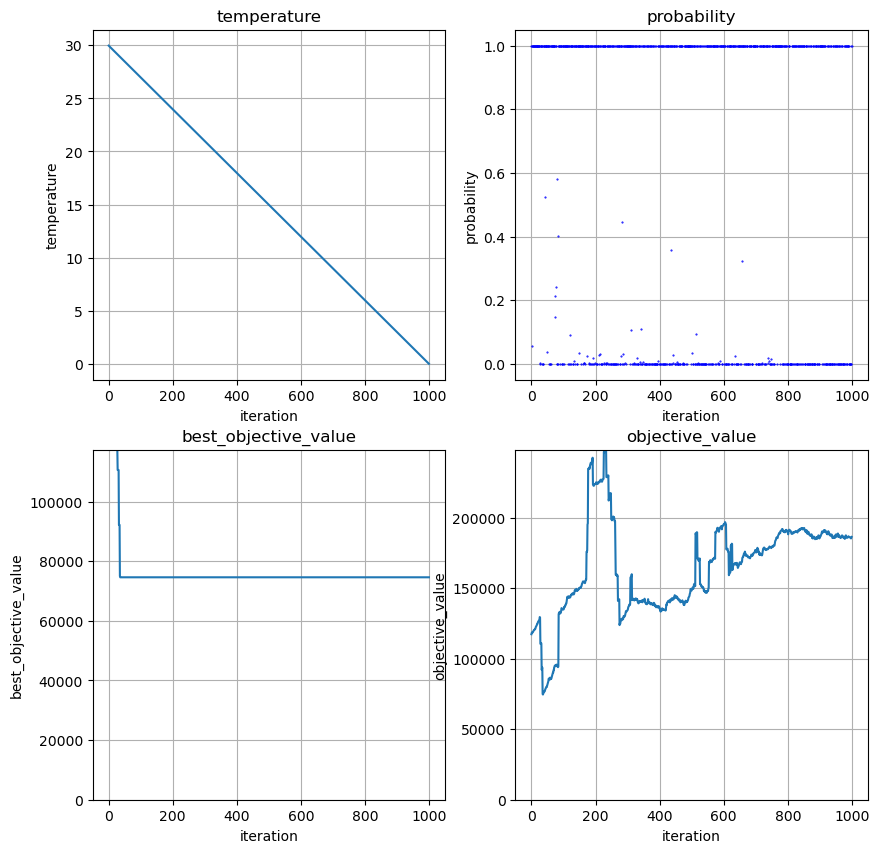

In [9]:
def cost(schedule: fac.FactoryAssignmentSchedule):
    return fac.get_cost(schedule)

def solution_generator(schedule: fac.FactoryAssignmentSchedule):
    return fac.random_neighbour(schedule)
    
def cool(_, k):
    temp = (1 - (k + 1) / max_iter) * init_temp

    if temp <= 10**(-9):
        return 0.0001
    return temp

def prob(delta_en, temp):
    if delta_en < 0:
        return 1
    return np.exp(-delta_en / (1.380649 * temp))

current_directory = os.getcwd()
time_assignment_problem_directory = os.path.dirname(os.path.dirname(current_directory))
db_path = os.path.join(time_assignment_problem_directory, "data", "factory_database", "order1.1.json")

max_iter = 10**3
init_temp = 30
init_sol = fac.generate_starting_solution(db_path)

solver = sol.Solver()
solver.SolutionType=fac.FactoryAssignmentSchedule
solver.cost=cost
solver.sol_gen=solution_generator
solver.cool=cool
solver.probability=prob
solver.init_sol=init_sol
solver.init_temp=init_temp
solver.max_iterations=max_iter
solver.experiment_name="order1 test"
solver.log_results=False
solver.remember_visited_solution=False

best_solution, scope = solver.simulate_annealing()

vis.plot_scope(scope)